### Reading the Dataset

In [21]:
import pandas as pd
df = pd.read_csv('data_refined.csv')

### Feature Selection

the best features are:  ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
     Unnamed: 0  radius_mean  texture_mean  perimeter_mean  area_mean  \
0             0     1.097064     -2.073335        1.269934   0.984375   
1             1     1.829821     -0.353632        1.685955   1.908708   
2             2     1.579888      0.456187        1.566503   1.558884   
3             3    -0.768909      0.253732       -0.592687  -0.764464   
4             4     1.750297     -1.151816        1.776573   1.826229   
..          ...          ...           ...             ...        ...   
564         564     2.110995      0.721473        2.060786   2.343856   
565         565     1.704854      2.085134        1.615931   1.723842   
566         566     0.702284      2.045574        0.672676   0.577953   
567         567     1.838341      2.336457        1.982524   1.735218   
568         568    -1.808401  

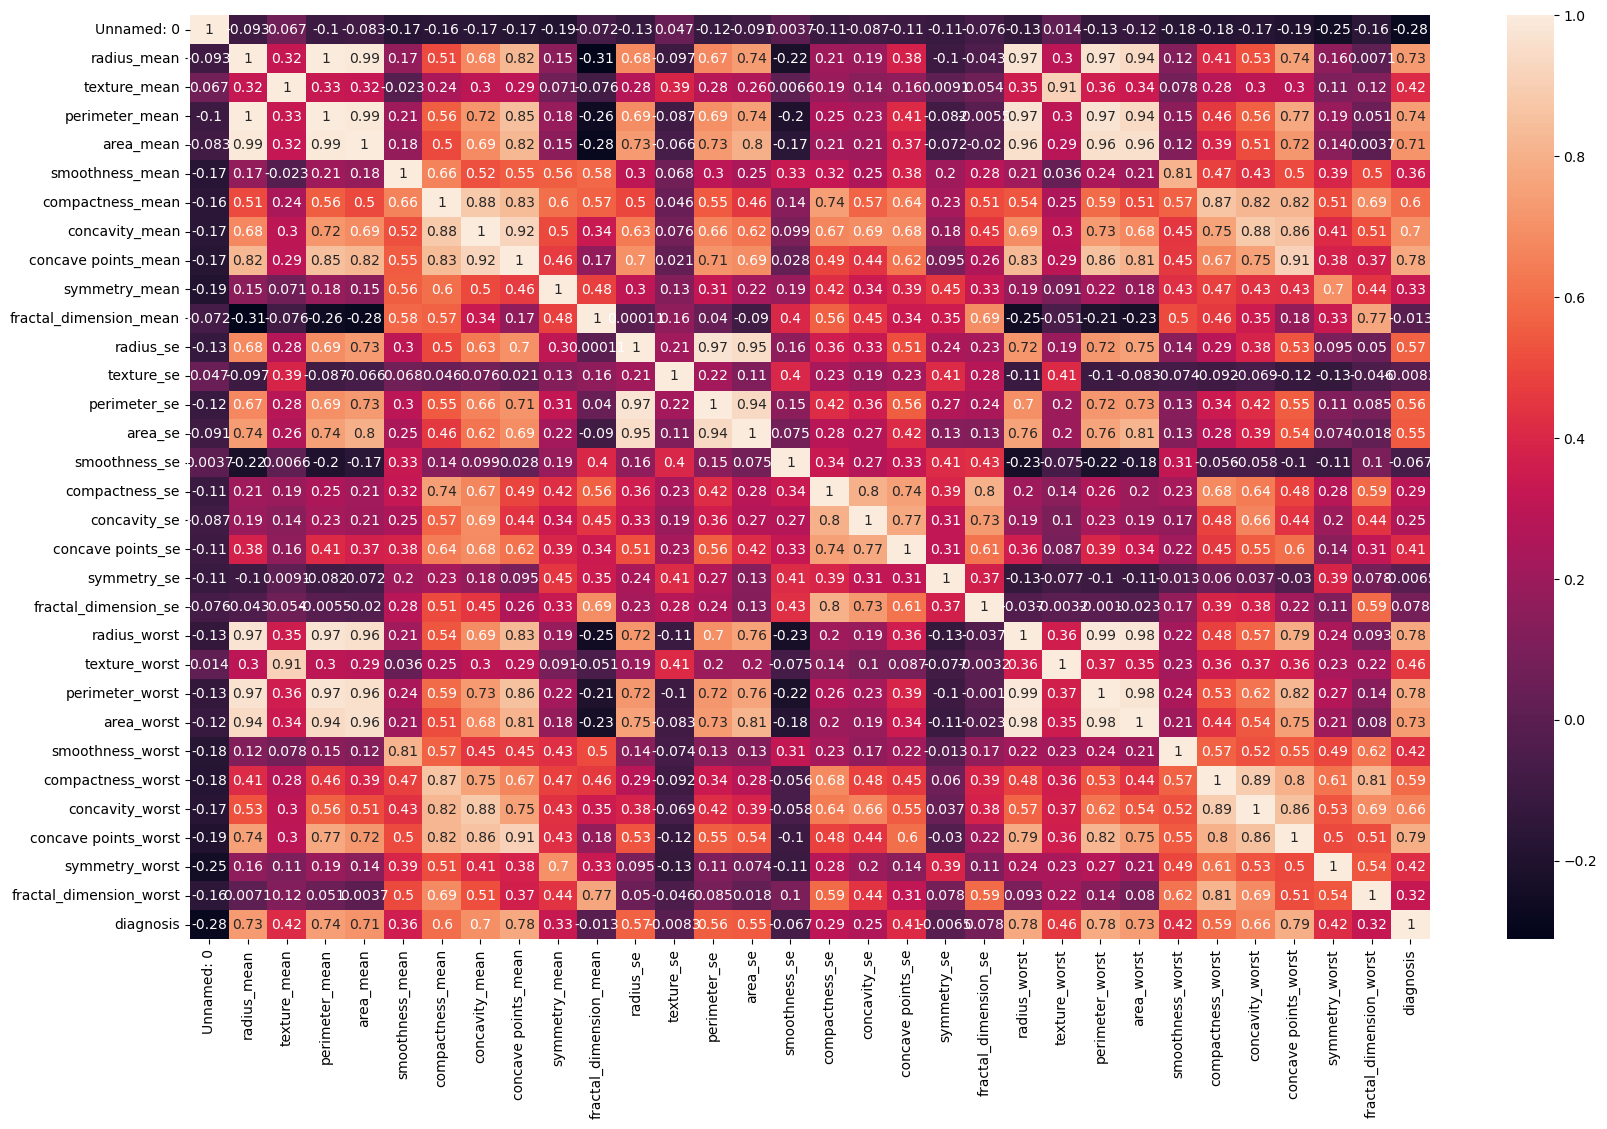

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

df_corr = pd.DataFrame(df.corr().reset_index())
cols = len(df_corr.columns)

features = []

for i in range(0,len(df_corr)):
    if abs(df_corr.iloc[i, cols-1:cols].item()) > .7:
        features.append(df_corr.iloc[i, 0:1].item())

features.remove('diagnosis')

print('the best features are: ', features)

data_ft = df.filter(features, axis = 1)
data_tar = df['diagnosis']

data_ft

data_all_ft = df.iloc[:, 0:cols-1]
print(data_all_ft)


### Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ft, data_tar, test_size=0.2, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(data_ft, data_tar, test_size=0.5, random_state=0)

# do the same for full model w/o reduced features

fX_train, fX_test, fy_train, fy_test = train_test_split(data_all_ft, data_tar, test_size=0.2, random_state=0)
fX_test, fX_validate, fy_test, fy_validate = train_test_split(data_all_ft, data_tar, test_size=0.5, random_state=0)


### Training Classifiers - KNN (Reduced Features)

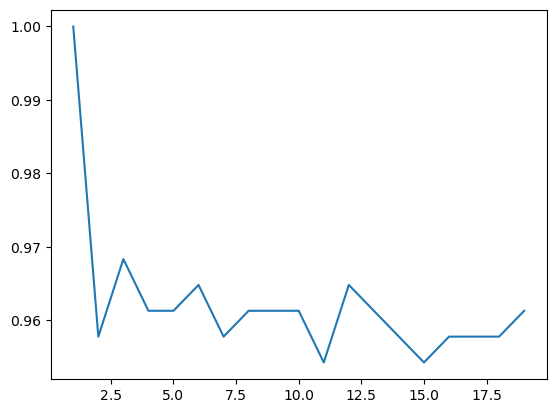

In [24]:
from sklearn.neighbors import KNeighborsClassifier
tests = range(1,20)

scores = []

for k in tests:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = model.score(X_test, y_test)
    scores.append(result)

plt.plot(tests, scores)

### Training Classifiers - KNN (full features)

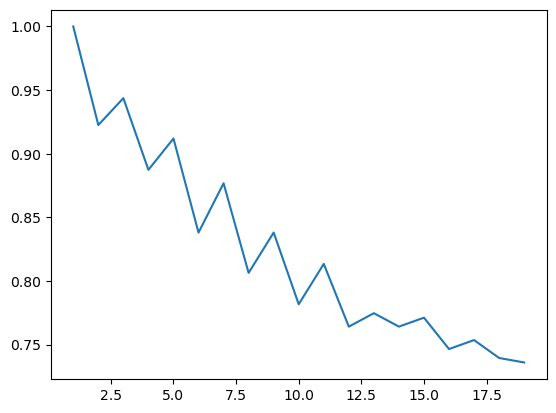

In [25]:
from sklearn.neighbors import KNeighborsClassifier
tests = range(1,20)

scores = []

for k in tests:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(fX_train, fy_train)
    y_pred = model.predict(fX_test)
    result = model.score(fX_test, fy_test)
    scores.append(result)

plt.plot(tests, scores)

### Training Classifiers - Random Forest (Reduced Features)

In [30]:
from sklearn.ensemble import RandomForestClassifier 
criteria = ['gini', 'entropy', 'log_loss']

forest_scores = []

for i in criteria:
    model = RandomForestClassifier(n_estimators=100, criterion=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = model.score(X_test,y_test)
    forest_scores.append(result)
    print(f'result for {i} ', result)

from sklearn.metrics import confusion_matrix
final_rf_model = RandomForestClassifier(n_estimators=100, criterion='gini').fit(X_train, y_train)
y_pred = final_rf_model.predict(X_validate)
print('Confusion matrix\n', confusion_matrix(y_pred, y_validate))

result for gini  1.0
result for entropy  1.0
result for log_loss  1.0
Confusion matrix
 [[183   2]
 [  1  99]]


### Training Classifiers - Random Forest (Reduced Features)

In [31]:
from sklearn.ensemble import RandomForestClassifier 
criteria = ['gini', 'entropy', 'log_loss']

forest_scores = []

for i in criteria:
    model = RandomForestClassifier(n_estimators=100, criterion=i)
    model.fit(fX_train, fy_train)
    y_pred = model.predict(fX_test)
    result = model.score(fX_test,fy_test)
    forest_scores.append(result)
    print(f'result for {i} ', result)

from sklearn.metrics import confusion_matrix
final_rf_model = RandomForestClassifier(n_estimators=100, criterion='gini').fit(fX_train, fy_train)
fy_pred = final_rf_model.predict(fX_validate)
print('Confusion matrix\n', confusion_matrix(fy_pred, fy_validate))

result for gini  1.0
result for entropy  1.0
result for log_loss  1.0
Confusion matrix
 [[184   0]
 [  0 101]]


### Training Classifiers - SVM (Reduced Features)

In [36]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# precomputed throws an error...

for ke in kernels:
    classifier = SVC(kernel=ke, C=.2, gamma='auto')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = classifier.score(X_test, y_test)
    print(f'for {ke} ', score)


# get confusion matrix for sigmoid

from sklearn.metrics import confusion_matrix
final_svc_model = SVC(kernel='sigmoid', C=.2, gamma='auto').fit(X_train, y_train)
y_pred = final_svc_model.predict(X_validate)
print('Confusion matrix\n', confusion_matrix(y_pred, y_validate))

for linear  0.9577464788732394
for poly  0.8556338028169014
for rbf  0.9401408450704225
for sigmoid  0.9366197183098591
Confusion matrix
 [[178  10]
 [  6  91]]


### Training Classifiers - SVM (All Features)

In [38]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# precomputed throws an error...

for ke in kernels:
    classifier = SVC(kernel=ke, C=.2, gamma='auto')
    classifier.fit(fX_train, fy_train)
    y_pred = classifier.predict(fX_test)
    score = classifier.score(fX_test, fy_test)
    print(f'for {ke} ', score)

# get confusion matrix for sigmoid

from sklearn.metrics import confusion_matrix
final_svc_model = SVC(kernel='sigmoid', C=.2, gamma='auto').fit(fX_train, fy_train)
fy_pred = final_svc_model.predict(fX_validate)
print('Confusion matrix\n', confusion_matrix(fy_pred, fy_validate))

for linear  1.0
for poly  1.0
for rbf  0.6373239436619719
for sigmoid  0.6126760563380281
Confusion matrix
 [[184 101]
 [  0   0]]


### Final model will be Random Forest w/ reduced features data, gini criterion and 100 n estimatiors

### Another way to reduce features?

In [49]:
data_ft.corr()
# appears radius, perimeter, and area are strongly correlated with one another; try new set of features w/o perimeter and area

data_ft_ref = data_ft[['radius_mean', 'concave points_mean', 'radius_worst', 'concave points_worst']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ft_ref, data_tar, test_size=0.2, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(data_ft_ref, data_tar, test_size=0.5, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = model.score(X_test, y_test)
print(result)


model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_validate)
result = model.score(X_validate, y_validate)
print(result)


0.9647887323943662
0.9438596491228071
